In [5]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from distribution_operation import *
from utils import *
from numerical_routine import *
from posterior_computation import *
from ash import *

In [6]:
betahat=  np.array([1,2,3,4,5])
sebetahat=np.array([1,0.4,5,1,1])

res= ash(betahat, sebetahat)

(5, 10)


In [7]:
true_val1=  np.random.normal(loc=0, scale=2, size=100)
true_val0=  np.zeros( 100)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=100)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=100)
# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])
mult=1.5

In [8]:
res= ash(betahat, sebetahat, prior="exp")
print(res.pi) 

[[ -0.13229224  -9.16163705 -11.92467839 ...  -2.30343286 -22.09116257
  -41.38598764]
 [ -0.13229224  -9.16163705 -11.92467839 ...  -2.30343286 -22.09116257
  -41.38598764]
 [ -0.13229224  -9.16163705 -11.92467839 ...  -2.30343286 -22.09116257
  -41.38598764]
 ...
 [ -0.13229224  -9.16163705 -11.92467839 ...  -2.30343286 -22.09116257
  -41.38598764]
 [ -0.13229224  -9.16163705 -11.92467839 ...  -2.30343286 -22.09116257
  -41.38598764]
 [ -0.13229224  -9.16163705 -11.92467839 ...  -2.30343286 -22.09116257
  -41.38598764]]
(200, 9)
[8.76084930e-01 1.04990882e-04 6.62487938e-06 6.02028874e-07
 4.24401274e-06 2.38833487e-02 9.99152592e-02 2.54641976e-10
 1.06241438e-18]
[8.76084930e-01 1.04990882e-04 6.62487938e-06 6.02028874e-07
 4.24401274e-06 2.38833487e-02 9.99152592e-02 2.54641976e-10
 1.06241438e-18]
[8.76084930e-01 1.04990882e-04 6.62487938e-06 6.02028874e-07
 4.24401274e-06 2.38833487e-02 9.99152592e-02 2.54641976e-10
 1.06241438e-18]
[8.76084930e-01 1.04990882e-04 6.62487938e-06 

Text(0, 0.5, 'posterior mean')

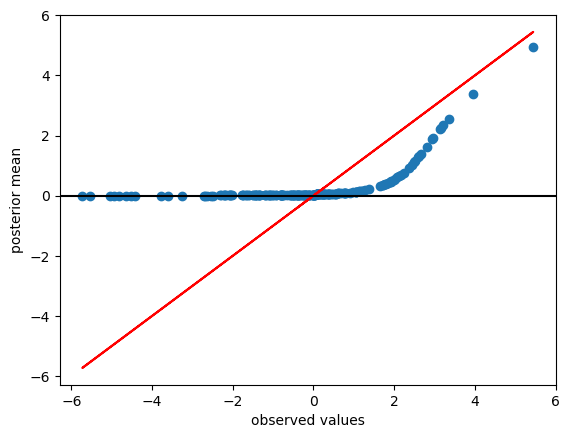

In [9]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")